___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.researchgate.net/profile/Sandip-Lahiri/publication/26543790/figure/fig1/AS:310045121236994@1450931925958/A-schematic-diagram-of-the-support-vector-regression-using-e-sensitive-loss-function.png" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2023
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://www.researchgate.net/profile/Sandip-Lahiri/publication/26543790/figure/fig1/AS:310045121236994@1450931925958/A-schematic-diagram-of-the-support-vector-regression-using-e-sensitive-loss-function.png</p>

### <font color= #2E9AFE> Tema:Máquinas de Soporte Vectorial basadas en Regresión (SVR)</font>

**¿Qué es?**

- Es un algoritmo de regresión que soporta tanto problemas lineales como no lineales. 

- La técnica de los vectores soporte es una herramienta universal para resolver problemas de estimación de funciones multidimensionales. 

- La idea es seleccionar el hiperplano regresor que mejor se ajuste a nuestro conjunto de datos de entrenamiento. 

- Se basa en considerar una distancia margen $\varepsilon$, de modo que esperamos que todos los datos se encuentren en una banda o tubo entorno a nuestro hiperplano. A la hora de definir el hiperplano sólo se consideran los datos que tengan una distancia más de $\varepsilon$ de nuestro hiperplano. En este caso esos datos serán los considerados como vectores soporte.

**Diferencia regresión simple y SVR**

En la regresión simple, se busca minimizar la tasa del error, mientras que en el SVR se busca ajustar el error dentro de cierto umbral, lo que significa que el trabajo del SVR es aproximar el mejor valor dentro de un margen dado llamado "e-tubo". 

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://www.mdpi.com/applsci/applsci-10-03086/article_deploy/html/images/applsci-10-03086-g004.png" width="450px" height="280px" />

**Algunos términos**

1. Hiperplano: es la línea que ayuda a predecir la variable target
2. Kernel: En el SVR, la regresión se realiza en una dimensión superior. Para hacer eso, necesitamos una función que debería asignar los puntos de datos a su dimensión superior. Esta función se denomina kernel. 
3. Líneas de soporte: estas son las dos líneas que se dibujan alrededor del hiperplano a una distancia de ε (épsilon). Se utiliza para crear un margen entre los puntos de datos.
4. Vector de soporte: Es el vector que se utiliza para definir el hiperplano o podemos decir que estos son los puntos de datos extremos en el conjunto de datos que ayudan a definir el hiperplano. Estos puntos de datos se encuentran cerca del límite.

**El truco del Kernel**

No todos los datos son linealmente separables, casi todos los datos están aleatoriamente distribuidos, lo cual hace difícil separar linealmente los datos. 

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/838/1*gXvhD4IomaC9Jb37tzDUVg.png" width="450px" height="280px" />

En escencia, lo que hace el truco del kernel es ofrecer una manera más eficiente y menos costosa de aumentar la dimensionalidad de los datos. 

**Algunos tipos de kernel**
- Lineal
$$K(x,x*)=x \cdot x^{*}$$
- Polinomial 
$$K(x,x*)=(x \cdot x^{*} +1)^{d}$$
- Gaussian Radial Basis 
$$K(x,x*)=\exp^{-\frac{\|x-x^{*}\|^{2}}{2\sigma^{2}}}$$

**Se deben cumplir varias cosas para obtener el resultado óptimo:**

- Este algoritmo funciona muy bien si se tienen los datos limpios. Si los datos están muy dispersos no se podrá crear una fórmula adecuada. Se recomienda estandarizar los datos previamente. 
- No es adecuado para conjuntos de datos grandes. Lleva mucho tiempo el entrenamiento
- Menos efectivo en conjuntos de datos con columnas superpuestas

**Hiperparámetros del SVR**
- C
- La variable que uses en el kernel
- Epsilon

In [1]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import (linear_kernel,polynomial_kernel,rbf_kernel)

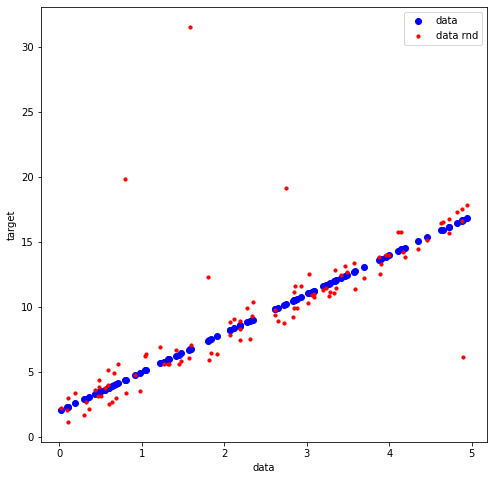

In [2]:
#%% generacion de los datos
rng = np.random.RandomState(0)

# #############################################################################
# Generar datos
X = 5 * rng.rand(100, 1)
y = np.ravel(3*X+2)
# Añadir ruido a las variables
yrnd = y + 3 * (0.5 - rng.rand(X.shape[0]))
yrnd[::20] += 50 * (0.5 - rng.rand(X.shape[0]//20))

X_plot = np.linspace(0, 5, len(X))[:, None]

#Graficar datos
plt.figure(figsize=(8,8))
plt.scatter(X, y, c='b', label='data')
plt.scatter(X, yrnd, c='r', s=10, label='data rnd',zorder=2)
plt.xlabel('data')
plt.ylabel('target')
plt.legend()
plt.show()

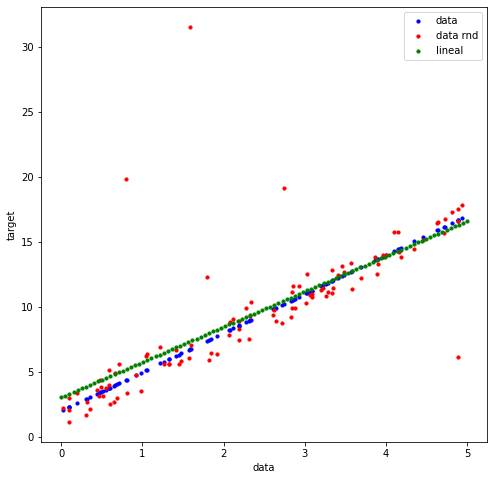

In [3]:
#Comparar con regresión lineal
from sklearn.linear_model import LinearRegression

modelo_lin = LinearRegression().fit(X,yrnd)
Ylin_plot = modelo_lin.predict(X_plot)

plt.figure(figsize=(8,8))
plt.scatter(X, y, c='b', s=10, label='data')
plt.scatter(X, yrnd, c='r', s=10, label='data rnd',zorder=2)
plt.scatter(X_plot, Ylin_plot, c='g', s=10, label='lineal',zorder=2)
plt.xlabel('data')
plt.ylabel('target')
plt.legend()
plt.show()

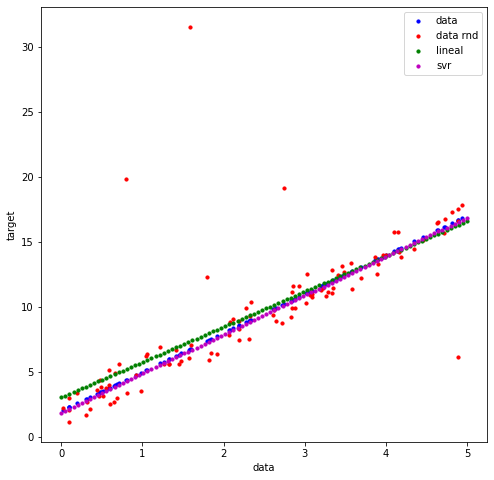

In [4]:
#¿Cómo se vería con el svr?
epsilon = 0.1
model_svr = SVR(kernel='linear', epsilon=epsilon)
model_svr.fit(X,yrnd)
Ysvr_plot = model_svr.predict(X_plot)

plt.figure(figsize=(8,8))
plt.scatter(X, y, c='b', s=10, label='data')
plt.scatter(X, yrnd, c='r', s=10, label='data rnd',zorder=2)
plt.scatter(X_plot, Ylin_plot, c='g', s=10, label='lineal',zorder=2)
plt.scatter(X_plot, Ysvr_plot, c='m', s=10, label='svr',zorder=2)
plt.xlabel('data')
plt.ylabel('target')
plt.legend()
plt.show()


La línea del SVR (rosa) se acerca mucho a los valores sin ruido (azul) y tiene más inmunidad a los outliers, esto ocurre por la función de costo. Un valor grande (outlier) ya no se eleva al cuadrado, osea que sólo se afecta de forma lineal. 


In [5]:
#Dimensión de los datos originales
np.shape(X)

(100, 1)

In [6]:
#dimensión de los datos después de la transformación del kernel

K_X =  linear_kernel(X)
#K_X =  polynomial_kernel(X)
#K_X =  rbf_kernel(X)

np.shape(K_X)

(100, 100)

#### Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, yrnd, test_size=0.20,
                                                    random_state=0,
                                                    shuffle=True)

In [8]:
#Escalamiento de los datos
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [9]:
#SVR
epsilon = 0.1
#Kernel Lineal
model_svr = SVR(kernel='linear', epsilon=epsilon)
#Kernel Radial
#model_svr = SVR(kernel='rbf', epsilon=epsilon)

#Entreno los datos con el train
model_svr.fit(X_train,y_train)

#Predicciones contra el test
Ypred = model_svr.predict(X_test)

#R2
print('R2 = %0.4f'%model_svr.score(X_test,y_test))

#MSE
from sklearn.metrics import mean_squared_error
print('MSE',mean_squared_error(y_test,Ypred))

R2 = 0.8852
MSE 2.4541154598428827


#### Cross validation

In [10]:
#Usando cross validation y grid search
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

model = SVR()

gs = GridSearchCV(model,
                  tuned_parameters, 
                  cv=2,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


In [11]:
#crear modelo usando parámetros óptimos
new_model = SVR(kernel='rbf', C=1000, gamma=0.0001)
new_model.fit(X_train, y_train)

SVR(C=1000, gamma=0.0001)

In [12]:
#R2
from sklearn.metrics import r2_score
yhat = new_model.predict(X_test)
R2_score = r2_score(y_test,yhat)
print('R2:', R2_score)


R2: 0.8670322755590009


In [13]:
#MSE
from sklearn.metrics import mean_squared_error
MSE_score = mean_squared_error(y_test,yhat)
print('MSE:', MSE_score)

MSE: 2.8428521494889316


**Ventajas**

- Es más efectivo para espacios de alta multidimensional
- Es efectivo en los cuasos cuando el número de variables es mayor al número de filas. 
- Es relativamente eficiente usando memoria computacional. 
- Es robusto ante datos atípicos
- Su implementación es fácil

**Desventajas**

- No es buen algoritmo para grandes datasets
- Periodos de entrenamiento largos. Requieren más tiempo de entrenamiento. 

**¿Cuál de los siguientes ejemplos podemos aplicar el algoritmo de SVR?**

- Opción 1: Predecir la temperatura de un lugar específico de acuerdo a los datos históricos
- Opción 2: Predecir si una acción de la bolsa de valores va a **subir** o **bajar**, utilizando los datos históricos
- Opción 3: Predecir la distancia en que un auto se detiene de acuerdo a la velocidad del mismo